In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import ast
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# 1. Data Collection and Understanding

In [3]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
# A glimpse of the dataset
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
movies['id'].describe()

,id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# 2. Data Preprocessing

In [8]:
# Merge datasets on movie title
movies = movies.merge(credits, on='title')
movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew', 'runtime', 'budget', 'revenue']]
movies.dropna(inplace=True)


# 3. Exploratory Data Analysis (EDA)

<ipython-input-9-45aa5eedeac2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.index, y=genre_count.values, palette='Set1')


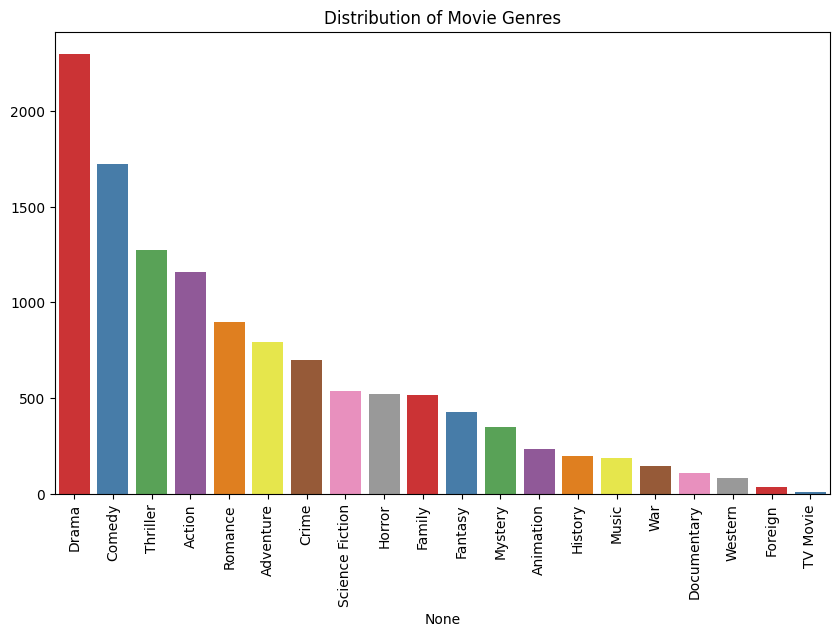

In [9]:
# Distribution of movie genres
plt.figure(figsize=(10, 6))
genre_names = [genre['name'] for genres_list in movies['genres'] for genre in ast.literal_eval(genres_list)]
genre_count = pd.Series(genre_names).value_counts()
sns.barplot(x=genre_count.index, y=genre_count.values, palette='Set1')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=90)
plt.show()

<ipython-input-10-79256ebabee2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='Set1')


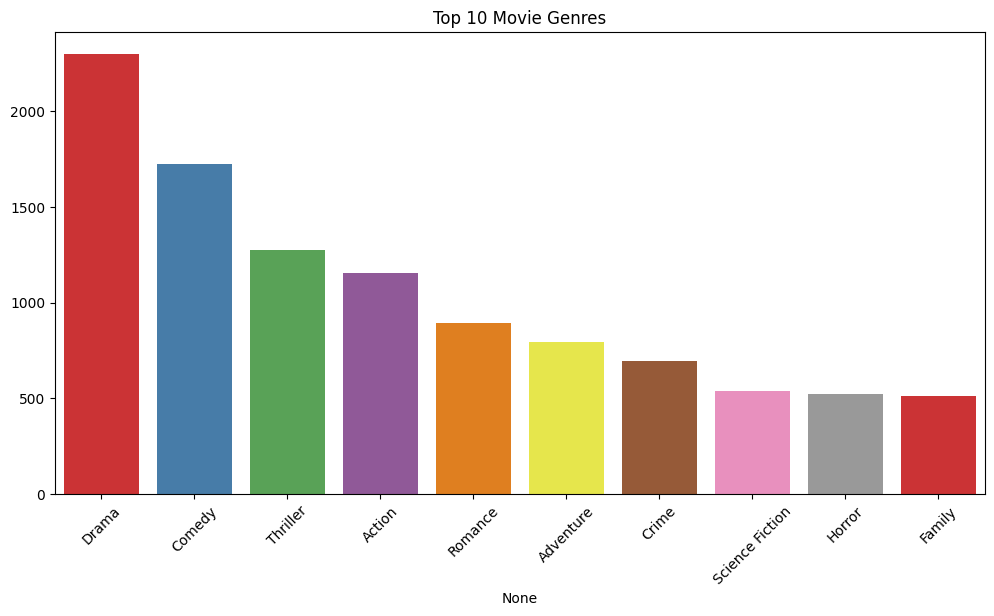

In [10]:
# Top genres visualization
plt.figure(figsize=(12, 6))
top_genres = genre_count.head(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='Set1')
plt.title('Top 10 Movie Genres')
plt.xticks(rotation=45)
plt.show()

<ipython-input-11-3866beb6d141>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=year_count.index, y=year_count.values, palette='Set1')


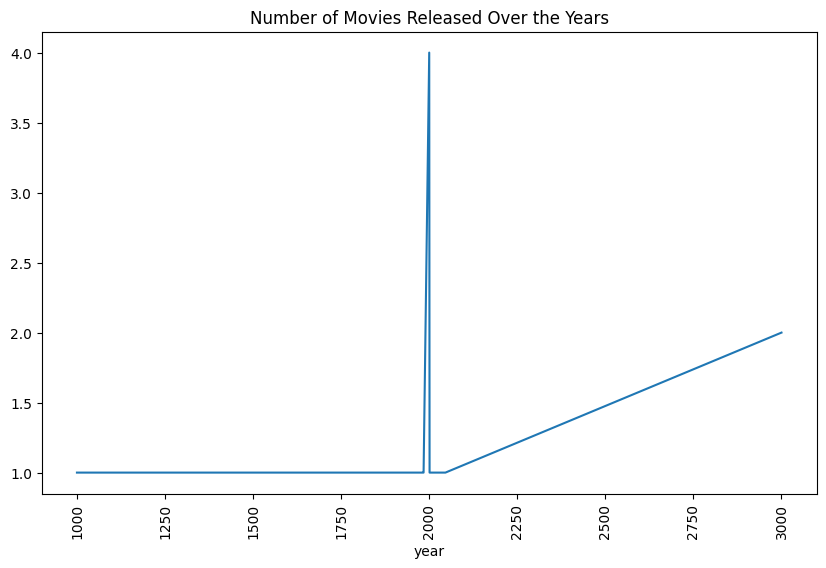

In [11]:
# Number of movies released over the years
movies['year'] = movies['title'].str.extract('(\d{4})')  # Extract year from title if present
movies['year'] = pd.to_numeric(movies['year'], errors='coerce') # Convert 'year' to numeric, invalid years will be NaN
year_count = movies['year'].value_counts().sort_index() # Sort by year for better visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x=year_count.index, y=year_count.values, palette='Set1')
plt.title('Number of Movies Released Over the Years')
plt.xticks(rotation=90)
plt.show()

<ipython-input-12-282fb5bca236>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=directors_count.index, y=directors_count.values, palette='Set1')


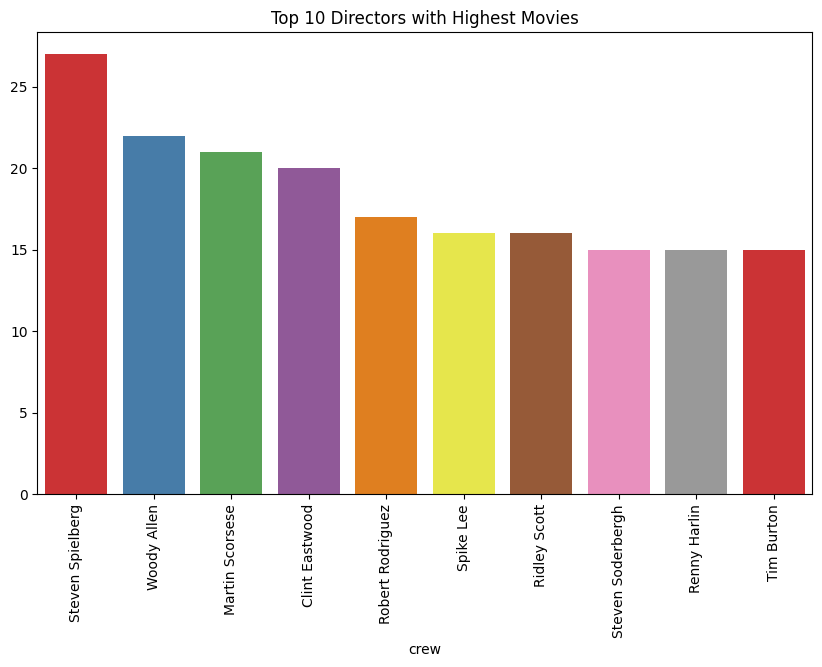

In [12]:
# Directors with highest movies
directors_count = movies['crew'].apply(lambda x: [i['name'] for i in ast.literal_eval(x) if i['job'] == 'Director'])
directors_count = directors_count.explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=directors_count.index, y=directors_count.values, palette='Set1')
plt.title('Top 10 Directors with Highest Movies')
plt.xticks(rotation=90)
plt.show()

<ipython-input-53-73d6ca5dae8a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_count.index, y=actor_count.values, palette=colors)


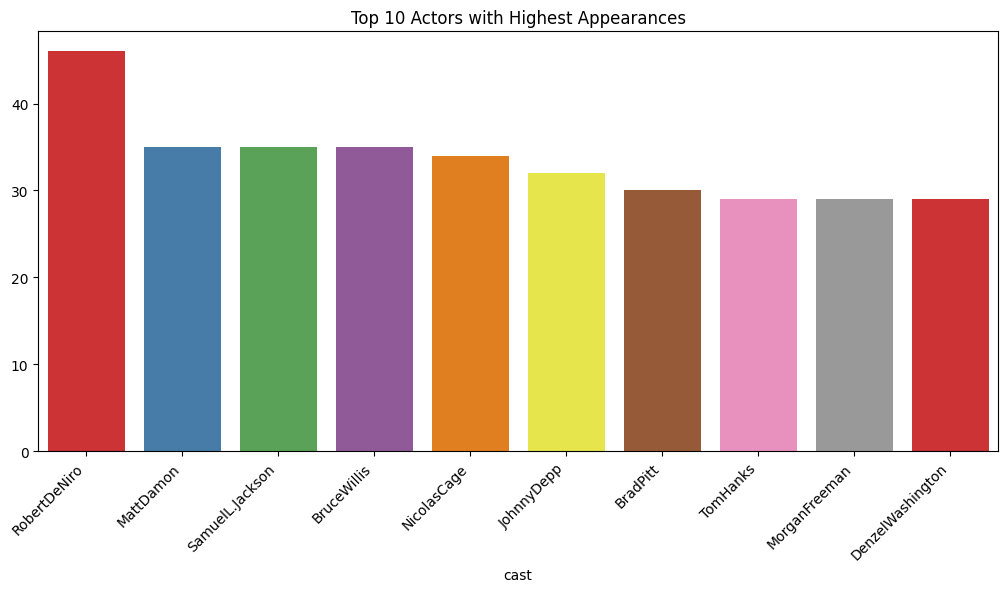

In [ ]:
#  Actors with highest appearances
# Exploding the 'cast' column, counting appearances, and limiting the number of actors shown
actor_count = movies.explode('cast')['cast'].value_counts().head(10)

plt.figure(figsize=(12, 6))  # Increased figure size for better spacing
colors = sns.color_palette('Set1', len(actor_count))  # Create color palette based on number of actors
sns.barplot(x=actor_count.index, y=actor_count.values, palette=colors)

plt.title('Top 10 Actors with Highest Appearances')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and reduce label font size
plt.yticks(fontsize=10)  # Adjust y-tick font size
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)  # Manually adjust margins
plt.show()

<ipython-input-13-d9e7bfec4459>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=movies, x='runtime', y='movie_id', alpha=0.6, palette='Set1')


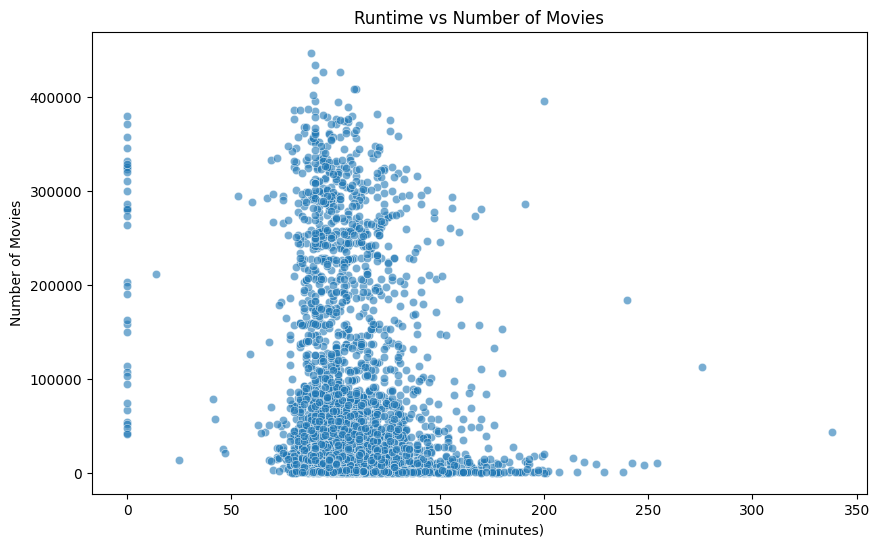

In [13]:
# Relationship between runtime and number of movies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='runtime', y='movie_id', alpha=0.6, palette='Set1')
plt.title('Runtime vs Number of Movies')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()

<ipython-input-14-6b96002afcf7>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=movies, x='runtime', y='budget', alpha=0.6, palette='Set1')


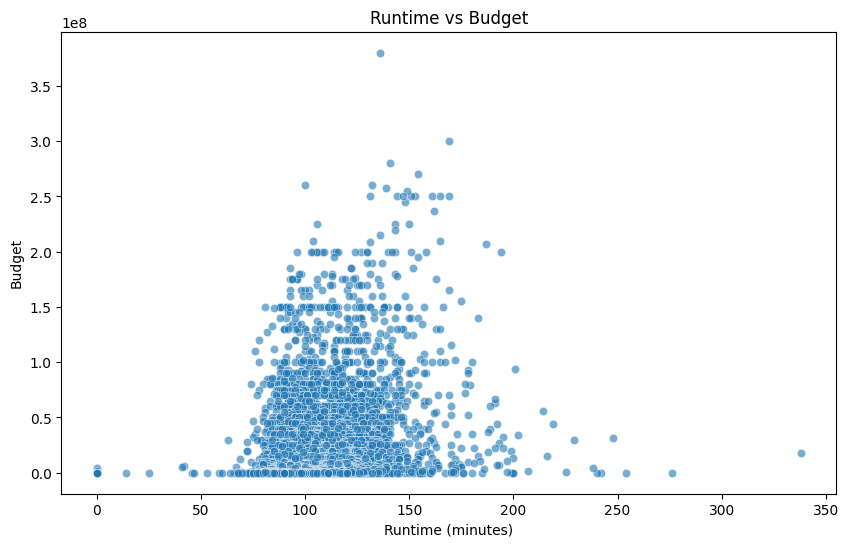

In [14]:
# Runtime vs Budget
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='runtime', y='budget', alpha=0.6, palette='Set1')
plt.title('Runtime vs Budget')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Budget')
plt.show()

<ipython-input-15-7787259290f1>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=movies, x='budget', y='revenue', alpha=0.6 , palette='Set1')


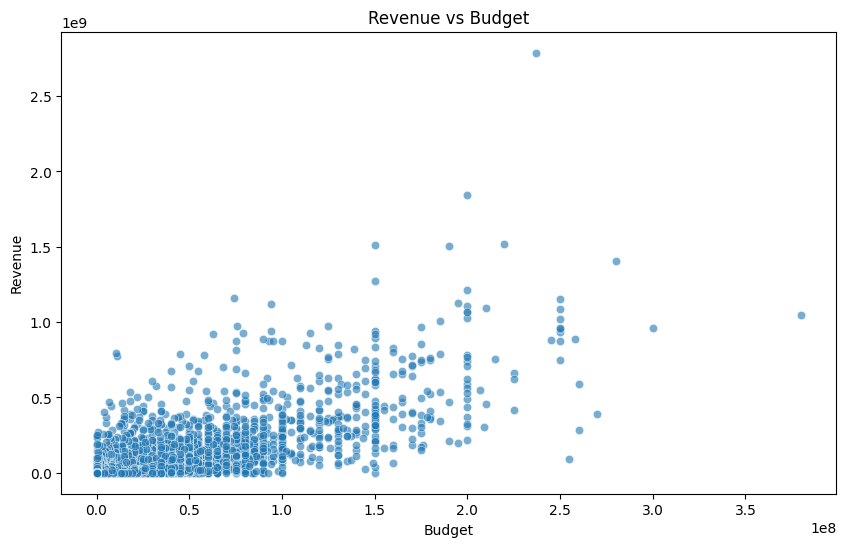

In [15]:
# Revenue vs Budget
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='budget', y='revenue', alpha=0.6 , palette='Set1')
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# 4. Feature Engineering

In [16]:
def convert(text):
    return [i['name'] for i in ast.literal_eval(text)]

movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)
movies['cast'] = movies['cast'].apply(convert).apply(lambda x: x[0:3])  # Keep top 3 cast members
movies['crew'] = movies['crew'].apply(lambda x: [i['name'] for i in ast.literal_eval(x) if i['job'] == 'Director'])

# Function to remove spaces in between names
def collapse(L):
    return [i.replace(" ", "") for i in L]

movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

# Create a new 'tags' column by merging relevant columns
movies['overview'] = movies['overview'].apply(lambda x: x.split())
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

# Prepare a new dataframe with only necessary columns
new = movies.drop(columns=['overview', 'genres', 'keywords', 'cast', 'crew'])
new['tags'] = new['tags'].apply(lambda x: " ".join(x))


In [17]:
new.head()

,movie_id,title,runtime,budget,revenue,year,tags
0,19995,Avatar,162.0,237000000,2787965087,NaN,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,169.0,300000000,961000000,NaN,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,148.0,245000000,880674609,NaN,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,165.0,250000000,1084939099,NaN,Following the death of District Attorney Harve...
4,49529,John Carter,132.0,260000000,284139100,NaN,"John Carter is a war-weary, former military ca..."


In [18]:
new['tags'].head()

,tags
0,"In the 22nd century, a paraplegic Marine is di..."
1,"Captain Barbossa, long believed to be dead, ha..."
2,A cryptic message from Bond’s past sends him o...
3,Following the death of District Attorney Harve...
4,"John Carter is a war-weary, former military ca..."


# 5. Model Selection and Training

In [19]:
# Vectorization using CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(new['tags']).toarray()

# Initialize PorterStemmer
ps = PorterStemmer()

# Function to apply stemming
def stem(text):
    return " ".join([ps.stem(word) for word in text.split()])

new['tags'] = new['tags'].apply(stem)

# Calculate similarity matrix
similarity = cosine_similarity(vector)

In [20]:
similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [21]:
similarity.shape

(4806, 4806)

# 6. Model Evaluation

In [73]:
# Function to recommend movies based on cosine similarity
def recommend(movie):
    if movie not in new['title'].values:
        return f"Error: '{movie}' not found in the dataset."

    index = new[new['title'] == movie].index[0]
    movie_list = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommendations = [new.iloc[i[0]].title for i in movie_list[1:6]]

    return recommendations


# Test the recommend function
recommended_movies_batman = recommend('Batman Begins')
recommended_movies_avatar = recommend('Avatar')
recommended_movies_John = recommend('John Carter')
recommended_movies_Pacific = recommend('Pacific Rim')
recommended_movies_Avengers = recommend('The Avengers')
recommended_movies_Fifty = recommend('Fifty Shades of Grey')
recommended_movies_spectre = recommend('Spectre')

print(f'Recommended Movies for "Batman Begins": {recommended_movies_batman}')
print(f'Recommended Movies for "Avatar": {recommended_movies_avatar}')
print(f'Recommended Movies for "John Carter": {recommended_movies_John}')
print(f'Recommended Movies for "Pacific Rim": {recommended_movies_Pacific}')
print(f'Recommended Movies for "The Avengers": {recommended_movies_Avengers}')
print(f'Recommended Movies for "Fifty Shades of Grey": {recommended_movies_Fifty}')
print(f'Recommended Movies for "Spectre": {recommended_movies_spectre}')


Recommended Movies for "Batman Begins": ['The Dark Knight', 'The Dark Knight Rises', 'Batman', 'Batman & Robin', 'Batman']
Recommended Movies for "Avatar": ['Titan A.E.', 'Small Soldiers', "Ender's Game", 'Aliens vs Predator: Requiem', 'Independence Day']
Recommended Movies for "John Carter": ['Star Trek: Insurrection', 'Mission to Mars', 'Captain America: The First Avenger', 'Escape from Planet Earth', 'Ghosts of Mars']
Recommended Movies for "Pacific Rim": ['Oblivion', 'Red Tails', "The World's End", 'Titan A.E.', 'Firefox']
Recommended Movies for "The Avengers": ['Avengers: Age of Ultron', 'Captain America: Civil War', 'Iron Man 3', 'Captain America: The First Avenger', 'Iron Man']
Recommended Movies for "Fifty Shades of Grey": ['Saved!', 'The Perfect Wave', 'Anna Karenina', 'Grace Unplugged', 'Higher Ground']
Recommended Movies for "Spectre": ['Quantum of Solace', 'Never Say Never Again', 'Skyfall', 'Thunderball', 'From Russia with Love']


# 7. Model Deployment

In [48]:
# Save the movie list and similarity matrix as pickle files
pickle.dump(new, open('movie_list.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [49]:
import os
os.environ['TMDB_API_KEY'] = '41c4dae9b4c5e47653d98fa2b8294954'

In [56]:
from pyngrok import ngrok

# Replace 'YOUR_NGROK_AUTH_TOKEN' with your actual ngrok auth token
ngrok.set_auth_token("2nI2xRS5myV6ZhZmHJPA1Qu6Uyh_eVHB98NeHbghGKssEF8E")

In [57]:
# Set up ngrok and run Streamlit
from pyngrok import ngrok

# Set your ngrok auth token
ngrok.set_auth_token("2nI2xRS5myV6ZhZmHJPA1Qu6Uyh_eVHB98NeHbghGKssEF8E")

# Open a tunnel on port 8501 (default port for Streamlit)
public_url = ngrok.connect(8501)
print(f"Public URL: {public_url}")

Public URL: NgrokTunnel: "https://149c-34-90-36-19.ngrok-free.app" -> "http://localhost:8501"


In [58]:
app_code = """
import streamlit as st
import pickle
import pandas as pd
import requests

# Function to fetch movie details including poster, description, cast, and crew
def fetch_movie_details(movie_id):
    api_key = "41c4dae9b4c5e47653d98fa2b8294954"

    # Fetch movie details (poster, description, genres, rating, runtime, tagline)
    movie_url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&language=en-US"
    movie_data = requests.get(movie_url).json()

    poster_path = movie_data['poster_path']
    full_poster_path = "https://image.tmdb.org/t/p/w500/" + poster_path
    description = movie_data['overview']
    genres = ", ".join([genre['name'] for genre in movie_data['genres']])
    rating = movie_data['vote_average']
    runtime = movie_data['runtime']
    tagline = movie_data['tagline']

    # Fetch movie cast and crew
    credits_url = f"https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={api_key}&language=en-US"
    credits_data = requests.get(credits_url).json()

    cast = [member['name'] for member in credits_data['cast'][:5]]  # Top 5 cast members
    crew = [member['name'] + " (" + member['job'] + ")" for member in credits_data['crew'] if member['job'] in ['Director', 'Producer']]

    return full_poster_path, description, genres, rating, runtime, tagline, cast, crew

# Recommendation function
def recommend(movie):
    index = movies[movies['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])

    recommended_movie_names = []
    recommended_movie_posters = []
    recommended_movie_descriptions = []
    recommended_movie_genres = []
    recommended_movie_ratings = []
    recommended_movie_runtimes = []
    recommended_movie_taglines = []
    recommended_movie_cast = []
    recommended_movie_crew = []

    for i in distances[1:6]:
        movie_id = movies.iloc[i[0]].movie_id
        (poster, description, genres, rating, runtime, tagline, cast, crew) = fetch_movie_details(movie_id)

        recommended_movie_posters.append(poster)
        recommended_movie_names.append(movies.iloc[i[0]].title)
        recommended_movie_descriptions.append(description)
        recommended_movie_genres.append(genres)
        recommended_movie_ratings.append(rating)
        recommended_movie_runtimes.append(runtime)
        recommended_movie_taglines.append(tagline)
        recommended_movie_cast.append(cast)
        recommended_movie_crew.append(crew)

    return (recommended_movie_names, recommended_movie_posters, recommended_movie_descriptions,
            recommended_movie_genres, recommended_movie_ratings, recommended_movie_runtimes,
            recommended_movie_taglines, recommended_movie_cast, recommended_movie_crew)

# Load the movies and similarity matrix
movies = pickle.load(open('movie_list.pkl', 'rb'))
similarity = pickle.load(open('similarity.pkl', 'rb'))
movies = pd.DataFrame(movies)

# Streamlit UI
st.header('Movie Recommendation System')

# Movie select box
movie_list = movies['title'].values
selected_movie = st.selectbox("Type or select a movie from the dropdown", movie_list)

# Button to show recommendations
if st.button('Show Recommendation'):
    (recommended_movie_names,
     recommended_movie_posters,
     recommended_movie_descriptions,
     recommended_movie_genres,
     recommended_movie_ratings,
     recommended_movie_runtimes,
     recommended_movie_taglines,
     recommended_movie_cast,
     recommended_movie_crew) = recommend(selected_movie)

    # Display recommendations in single column layout
    for i in range(5):
        st.subheader(recommended_movie_names[i])
        st.image(recommended_movie_posters[i])
        st.write(f"**Description:** {recommended_movie_descriptions[i]}")
        st.write(f"**Genres:** {recommended_movie_genres[i]}")
        st.write(f"**Rating:** {recommended_movie_ratings[i]}")
        st.write(f"**Runtime:** {recommended_movie_runtimes[i]} minutes")
        st.write(f"**Tagline:** {recommended_movie_taglines[i]}")
        st.write(f"**Cast:** {', '.join(recommended_movie_cast[i])}")
        st.write(f"**Crew:** {', '.join(recommended_movie_crew[i])}")
        st.markdown("---")
    """
with open('app.py', 'w') as f:
    f.write(app_code)

In [59]:
# Run the app.py script in the background
get_ipython().system_raw('streamlit run app.py &')

In [60]:
# Run the Streamlit app
!streamlit run app.py --server.port 8501



2024-10-20 09:14:19.122 Port 8501 is already in use
